# Cumulative Matching Characteristic (CMC) 

In [3]:
from matplotlib import pyplot as plt
import pandas as pd

In [6]:
algorithms = [
    "GlobalDict", "LocalDict",
#     "RidgeDict"
]

color_dict = {
   "GlobalDict":"red", "LocalDict":"green", "RidgeDict":"blue" ,  
#     , "yellow"
}

df = {}

for name in algorithms:
    file_path = r"D:\KSIP\csv\\" + name + ".csv"
    print(name)
    df[name] = pd.read_csv(file_path)
    df[name].head(5)

GlobalDict
LocalDict


## Plot Rank PDF

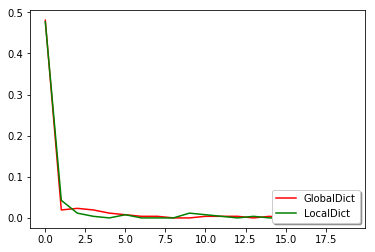

In [8]:
pdf = {}
for name in algorithms:
    rank = df[name]['Rank']
    rank = rank.value_counts(1)
    pdf[name] = []
    for i in range(1,21):
        if i in rank:
            pdf[name].append(rank[i])
        else:
            pdf[name].append(0)

    plt.plot(pdf[name], color=color_dict[name])
plt.legend((algorithms),
        loc='lower right', shadow=True)

## Plot Rank CMC

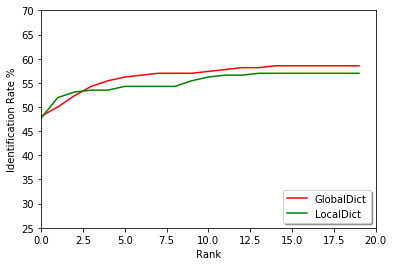

In [11]:
cdf = {}
for name in algorithms:
    cdf[name] = [pdf[name][0]*100]

    for i in range(1,20):
        cdf[name].append(cdf[name][i-1] + pdf[name][i]*100)

    # fig, ax = plt.subplots()

    plt.ylim([25,70])
    plt.xlim([0,20])
    plt.plot(cdf[name],color=color_dict[name])

plt.xlabel('Rank')
plt.ylabel('Identification Rate %')

plt.legend((algorithms),
        loc='lower right', shadow=True)